In [ ]:
#Section 0: Data Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from itertools import combinations

file_path = 'recipeData.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [17]:
#Section 1: Data Structure

# 1.1 Shape
print("Dataset shape:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# 1.2 Columns
print("\nColumns:")
print(df.columns.tolist())

# 1.3 Stored Data Types
print("\nStored Data Types:")
print(df.dtypes)

# 1.4 Suspected Categorical (Numeric columns with few unique values)
suspected_categorical = {}
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and df[col].nunique() < 15:
        suspected_categorical[col] = {
            'unique_values': df[col].nunique(),
            'suggested_type': 'categorical'
        }

print("\nSuspected numeric columns that may be categorical:")
for k, v in suspected_categorical.items():
    print(f"- {k}: {v['unique_values']} unique values → {v['suggested_type']}")

# 1.5 Ordinal candidates (Likert-like scales)
likely_ordinal = {}
for col in df.select_dtypes(include=[np.number]).columns:
    vals = sorted(df[col].dropna().unique())
    if set(vals).issubset({1, 2, 3, 4, 5}) or set(vals).issubset({-2, -1, 0, 1, 2}):
        likely_ordinal[col] = vals

print("\nLikely ordinal variables:")
for k, v in likely_ordinal.items():
    print(f"- {k}: {v}")

# 1.6 Descriptive Statistics Summary
print("\nDescriptive statistics (mean, std, min, max, etc.):")
desc_stats = df.describe(include='all').T
desc_stats['missing'] = df.isnull().sum()
desc_stats['skewness'] = df.skew(numeric_only=True)
desc_stats['kurtosis'] = df.kurt(numeric_only=True)

display(desc_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing', 'skewness', 'kurtosis']])


Dataset shape: (73861, 243)
Number of rows: 73861
Number of columns: 243

Columns:
['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId', 'Size(L)_log', 'OG_log', 'BoilSize_log', 'UserId_log', 'ABV_to_IBU', 'BeerID_x_StyleID', 'BeerID_x_Size(L)', 'BeerID_x_OG', 'BeerID_x_FG', 'BeerID_x_ABV', 'BeerID_x_IBU', 'BeerID_x_Color', 'BeerID_x_BoilSize', 'BeerID_x_BoilTime', 'BeerID_x_BoilGravity', 'BeerID_x_Efficiency', 'BeerID_x_MashThickness', 'BeerID_x_PitchRate', 'BeerID_x_PrimaryTemp', 'BeerID_x_UserId', 'BeerID_x_Size(L)_log', 'BeerID_x_OG_log', 'BeerID_x_BoilSize_log', 'BeerID_x_UserId_log', 'BeerID_x_ABV_to_IBU', 'StyleID_x_Size(L)', 'StyleID_x_OG', 'StyleID_x_FG', 'StyleID_x_ABV', 'StyleID_x_IBU', 'StyleID_x_Color', 'StyleID_x_BoilSize', 'StyleID_x_BoilTime', 'StyleID_x_BoilGravity

,count,mean,std,min,25%,50%,75%,max,missing,skewness,kurtosis
BeerID,73861.0,36931.0,21321.978453,1.0,18466.0,36931.0,55396.0,73861.0,0,0.000000,-1.200000
Name,73861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
URL,73861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
Style,73861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
StyleID,73861.0,60.179432,56.811462,1.0,10.0,35.0,111.0,176.0,0,0.656006,-1.056568
...,...,...,...,...,...,...,...,...,...,...,...
ingredient_count,73861.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,0,0.000000,0.000000
uses_top_fermentation,73861.0,0.265214,0.44145,0.0,0.0,0.0,1.0,1.0,0,1.063730,-0.868502
uses_bottom_fermentation,73861.0,0.055645,0.229237,0.0,0.0,0.0,0.0,1.0,0,3.876929,13.030933
ColorCategory,73723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138,NaN,NaN


Missing Values Summary:
               Missing Count  Missing %
PrimingAmount          69087  93.536508
PrimingMethod          67101  90.847673
UserId                 50490  68.358132
PitchRate              39252  53.143066
MashThickness          29864  40.432705
PrimaryTemp            22662  30.681957
BoilGravity             2990   4.048144
Style                    596   0.806921
Name                       2   0.002708

Descriptive statistics with skewness:
                 count          mean           std     min        25%  \
BeerID         73861.0  36931.000000  21321.978453   1.000  18466.000   
StyleID        73861.0     60.179432     56.811462   1.000     10.000   
Size(L)        73861.0     43.929775    180.373492   1.000     18.930   
OG             73861.0      1.406266      2.196908   1.000      1.051   
FG             73861.0      1.075865      0.432524  -0.003      1.011   
ABV            73861.0      6.136865      1.883510   0.000      5.080   
IBU            73861.0    

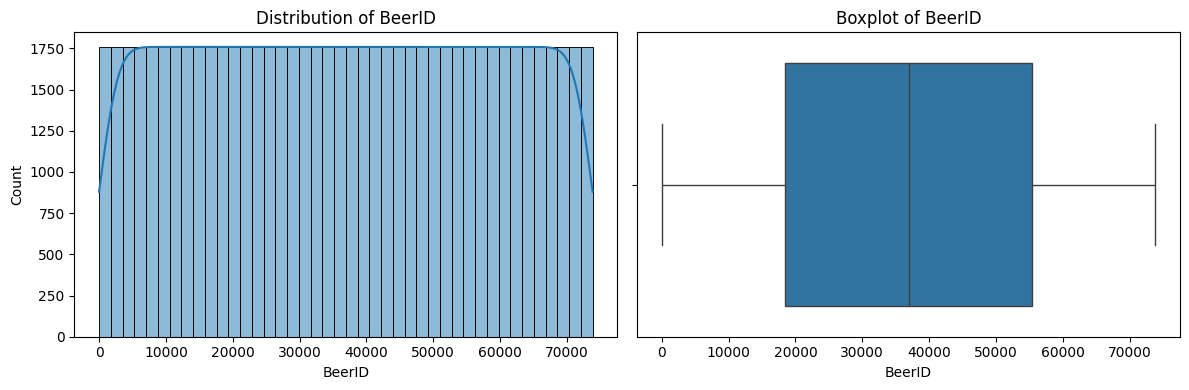

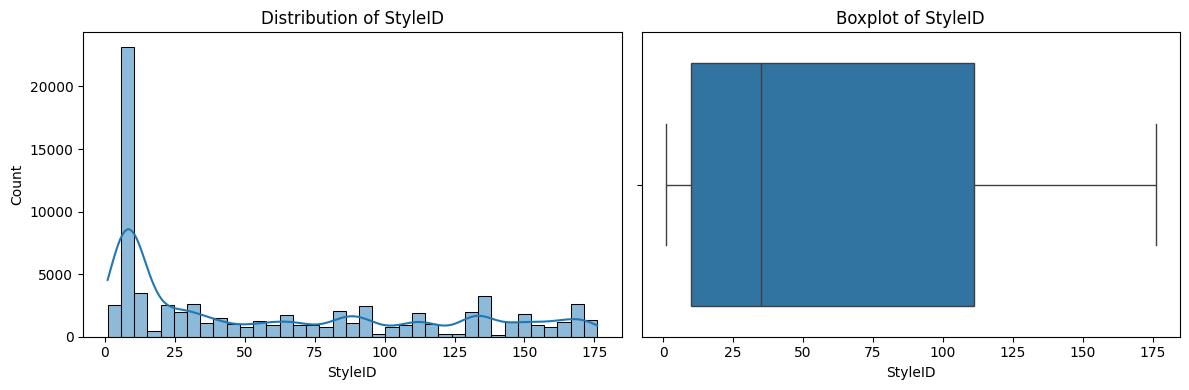

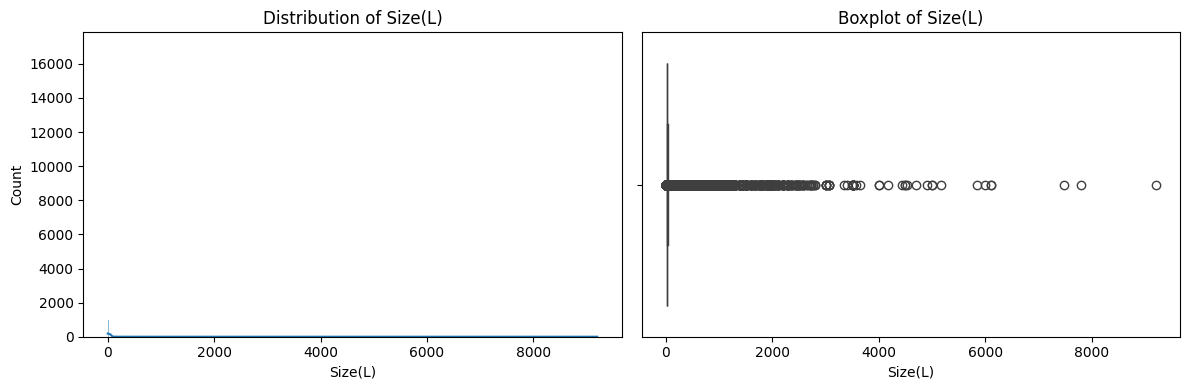

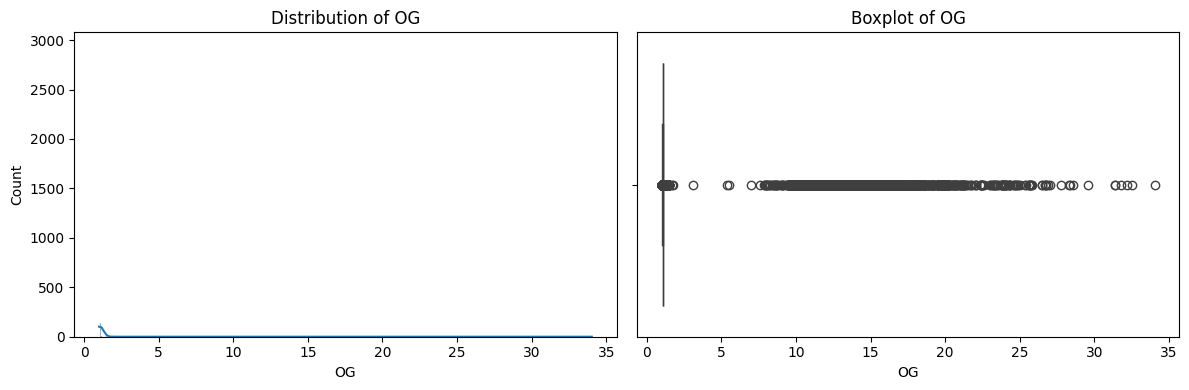

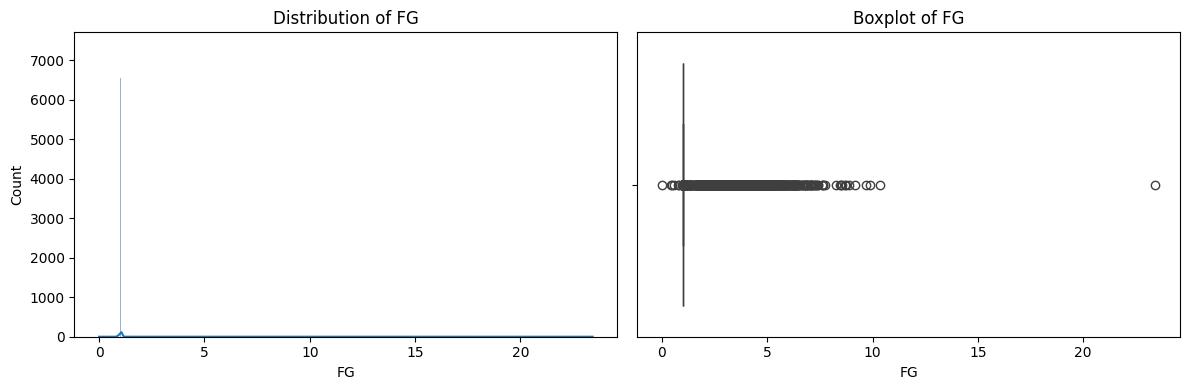

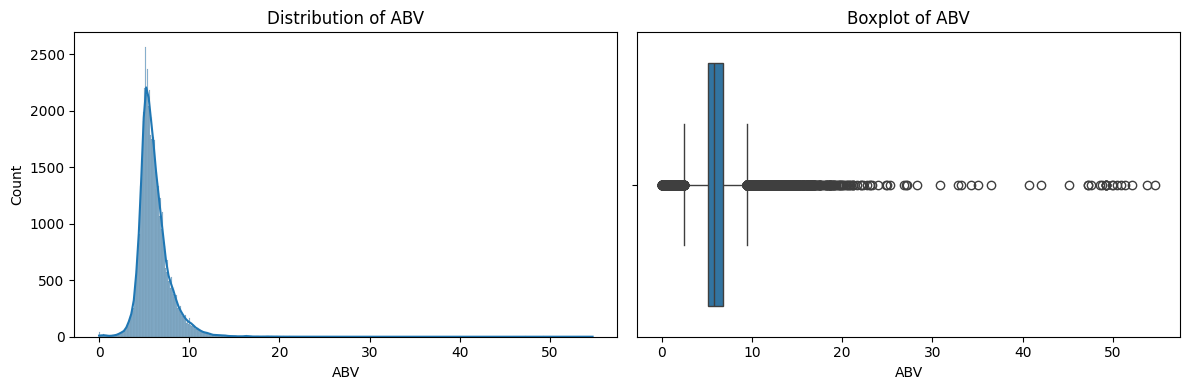

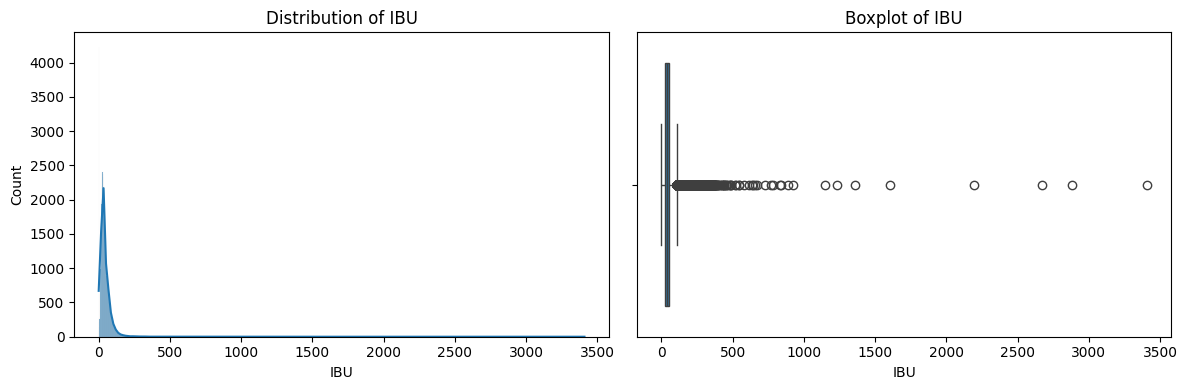

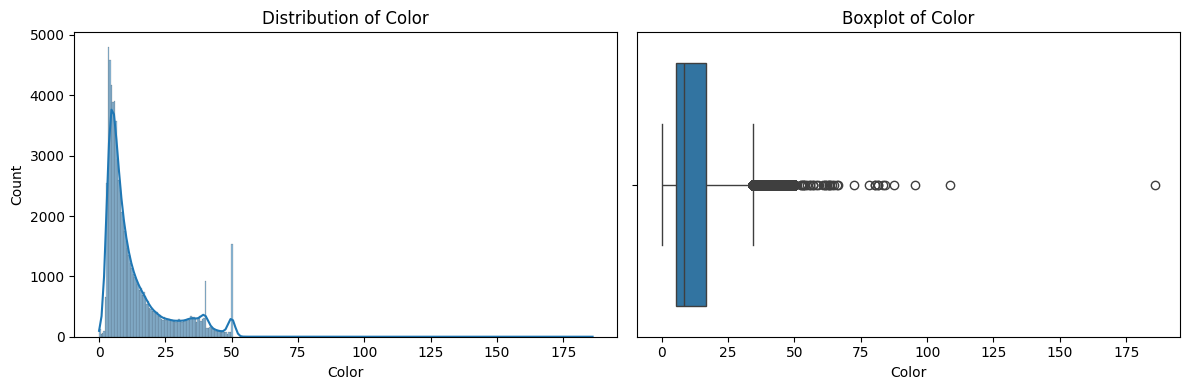

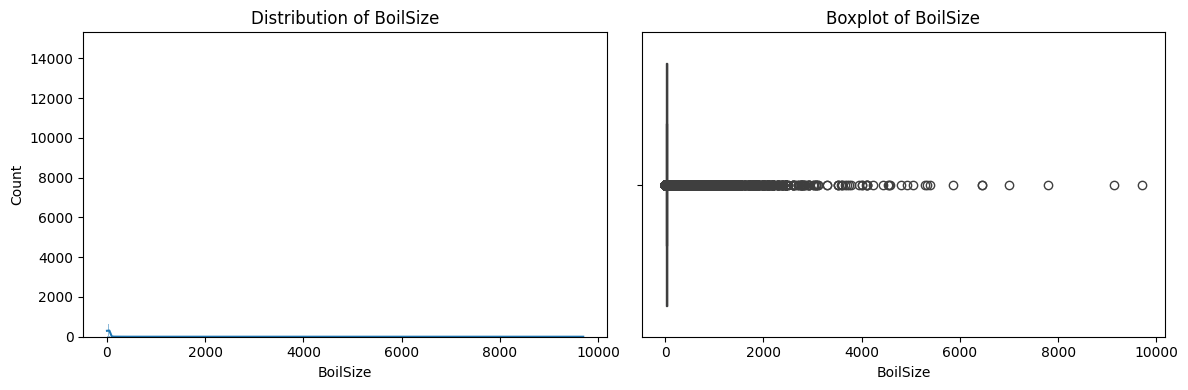

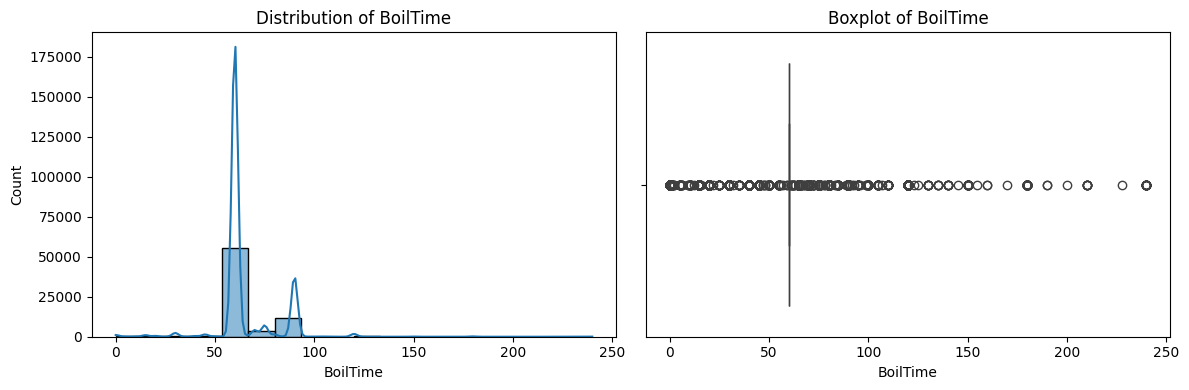

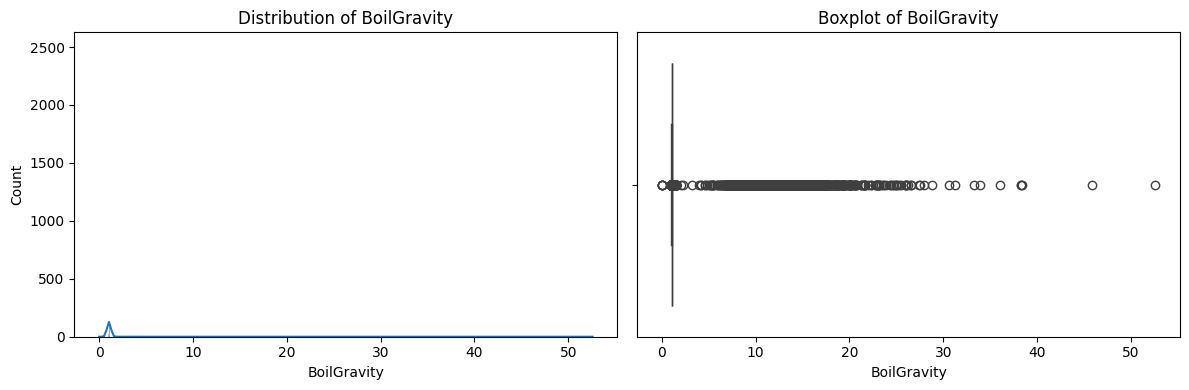

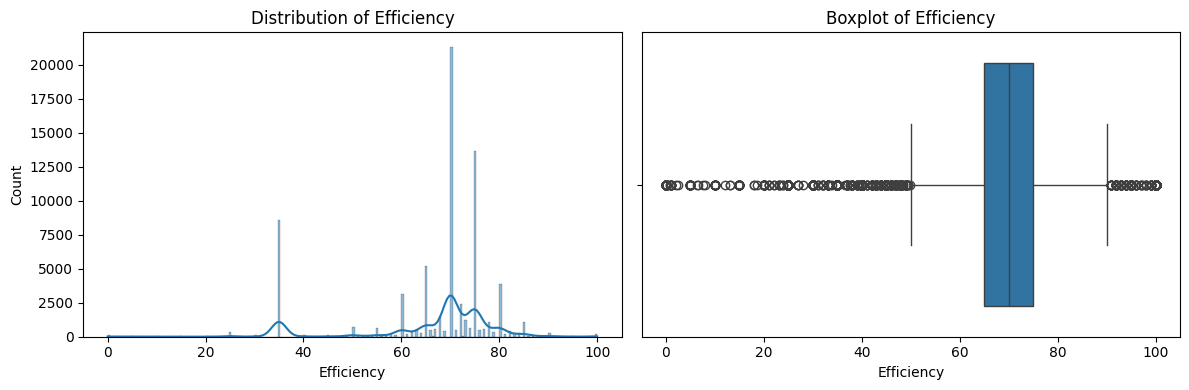

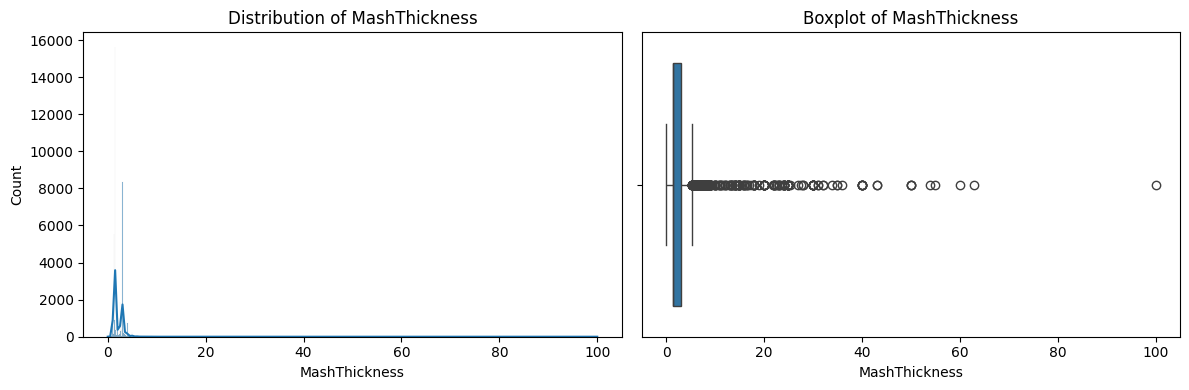

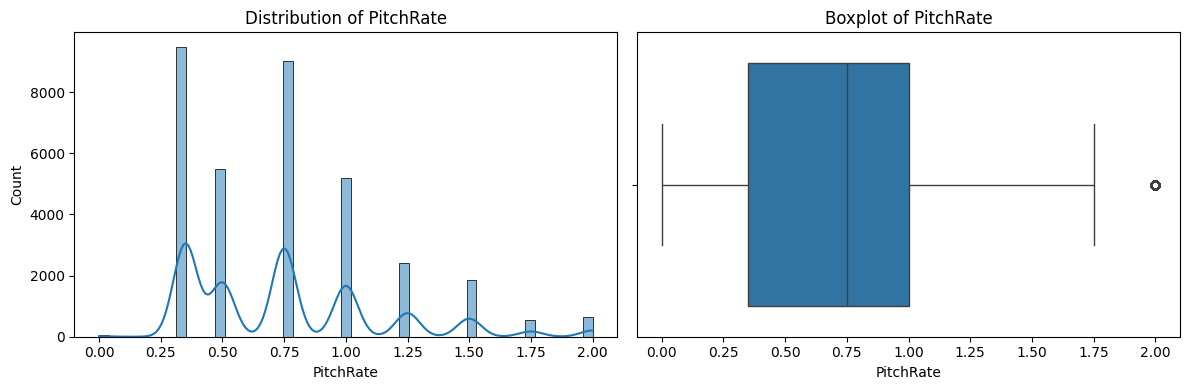

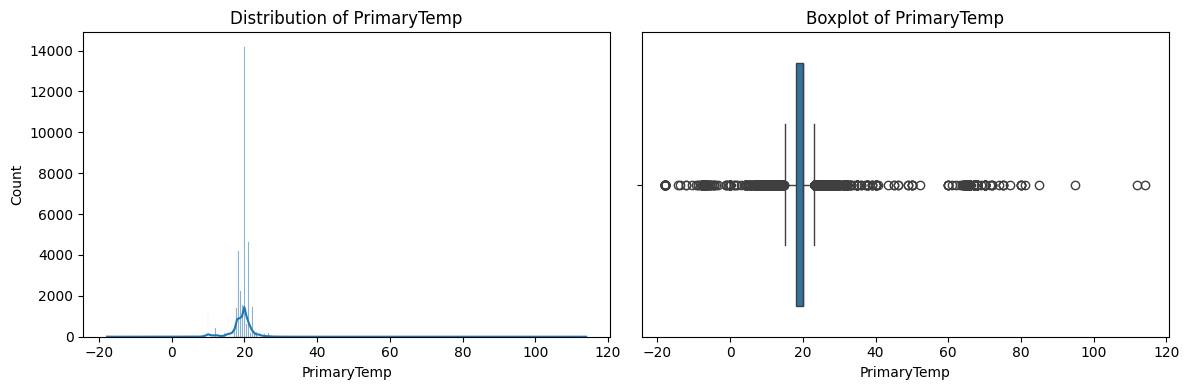

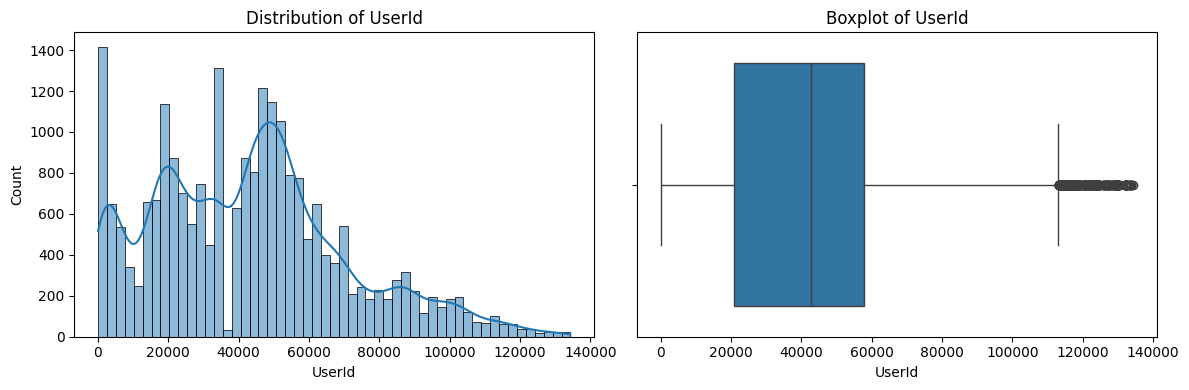


Columns with outliers > 3 std deviations from mean:
{'Size(L)': 887, 'OG': 1893, 'FG': 1610, 'ABV': 865, 'IBU': 774, 'Color': 1657, 'BoilSize': 861, 'BoilTime': 1558, 'BoilGravity': 1822, 'Efficiency': 244, 'MashThickness': 207, 'PitchRate': 640, 'PrimaryTemp': 384, 'UserId': 71}
Imputed missing values in Name with mode: Awesome Recipe
Imputed missing values in Style with mode: American IPA
Imputed missing values in BoilGravity with median: 1.047
Imputed missing values in MashThickness with median: 1.5
Imputed missing values in PitchRate with median: 0.75
Imputed missing values in PrimaryTemp with median: 20.0
Imputed missing values in PrimingMethod with mode: Corn Sugar
Imputed missing values in PrimingAmount with mode: 5 oz
Imputed missing values in UserId with median: 42897.0

Log-transformed columns due to high skewness (>1):
['Size(L)', 'OG', 'BoilSize', 'UserId']

Created feature: ABV_to_IBU (Alcohol / Bitterness)


/tmp/ipython-input-14-3714614817.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-14-3714614817.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
#Section 2: Data Quality

# 2.1 Missing Values Report
missing_report = df.isnull().sum()
missing_percent = (missing_report / len(df)) * 100
missing_summary = pd.DataFrame({
    "Missing Count": missing_report,
    "Missing %": missing_percent
}).sort_values("Missing Count", ascending=False)

print("Missing Values Summary:")
print(missing_summary[missing_summary["Missing Count"] > 0])

# 2.2 Descriptive Statistics + Skewness
numeric_desc = df.describe().T
numeric_desc["skewness"] = df[numeric_desc.index].skew()
print("\nDescriptive statistics with skewness:")
print(numeric_desc)

# 2.3 Constant Columns (zero variance)
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("\nConstant columns (only one unique value):", constant_columns)

# 2.4 Duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# 2.5 Special Codes (e.g., 999 used as missing)
special_code_columns = {}
for col in df.select_dtypes(include=[np.number]).columns:
    if 999 in df[col].unique():
        special_code_columns[col] = int((df[col] == 999).sum())

print("\nColumns with value 999 (potential special codes):")
print(special_code_columns)

# 2.6 Visualizations: Distribution and Outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col].dropna(), ax=ax[0], kde=True)
    ax[0].set_title(f'Distribution of {col}')
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# 2.7 Outliers (based on standard deviation > 3)
outlier_std_dev = {}
for col in numeric_cols:
    if df[col].dtype != 'object':
        mean = df[col].mean()
        std = df[col].std()
        outliers = df[(df[col] < mean - 3 * std) | (df[col] > mean + 3 * std)].shape[0]
        if outliers > 0:
            outlier_std_dev[col] = outliers

print("\nColumns with outliers > 3 std deviations from mean:")
print(outlier_std_dev)

# 2.8 Imputation (median/mode)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Imputed missing values in {col} with median: {median_value}")
        else:
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Imputed missing values in {col} with mode: {mode_value}")

# 2.9 Create Missing Indicators (confounding)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[f"{col}_missing"] = df[col].isnull().astype(int)

# 2.10 Log Transformation for Skewness Fixing
skewed_cols = []
for col in numeric_cols:
    if df[col].min() > 0:  # Log transform only on positive values
        sk = skew(df[col])
        if abs(sk) > 1:
            df[f"{col}_log"] = np.log1p(df[col])
            skewed_cols.append(col)

print("\nLog-transformed columns due to high skewness (>1):")
print(skewed_cols)

# 2.11 Feature Generation Example: ABV to IBU ratio
if 'ABV' in df.columns and 'IBU' in df.columns:
    df['ABV_to_IBU'] = df['ABV'] / (df['IBU'] + 1e-5)
    print("\nCreated feature: ABV_to_IBU (Alcohol / Bitterness)")

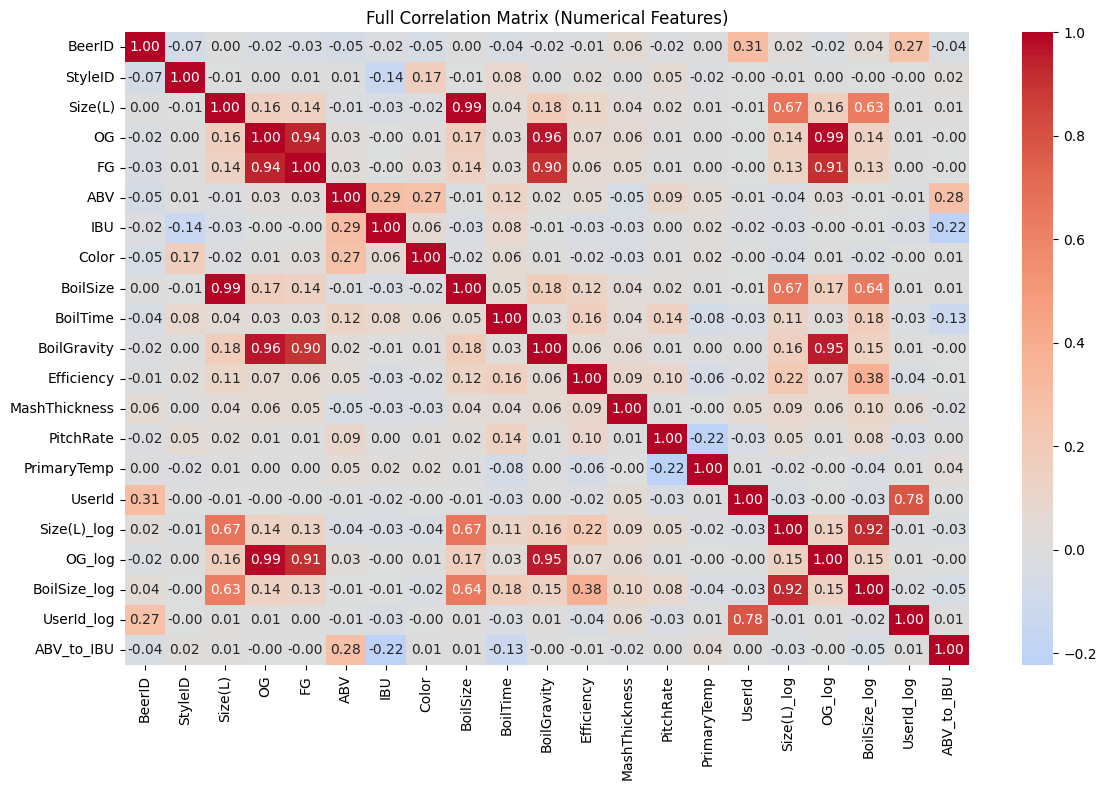


Top variable correlations (|r| > 0.7):
BoilSize      Size(L)        0.994143
OG_log        OG             0.988123
BoilGravity   OG             0.962511
OG_log        BoilGravity    0.954308
FG            OG             0.936347
BoilSize_log  Size(L)_log    0.919884
OG_log        FG             0.910001
BoilGravity   FG             0.903465
UserId_log    UserId         0.782543
dtype: float64

Correlation of features with ABV:
ABV              1.000000
IBU              0.290889
ABV_to_IBU       0.276707
Color            0.271332
BoilTime         0.120629
PitchRate        0.089193
Efficiency       0.047853
PrimaryTemp      0.046318
OG               0.029432
OG_log           0.027743
FG               0.026851
BoilGravity      0.024287
StyleID          0.006617
BoilSize_log    -0.007818
UserId_log      -0.009789
BoilSize        -0.009800
UserId          -0.010549
Size(L)         -0.013527
Size(L)_log     -0.037116
MashThickness   -0.047571
BeerID          -0.051921
Name: ABV, dtype: floa

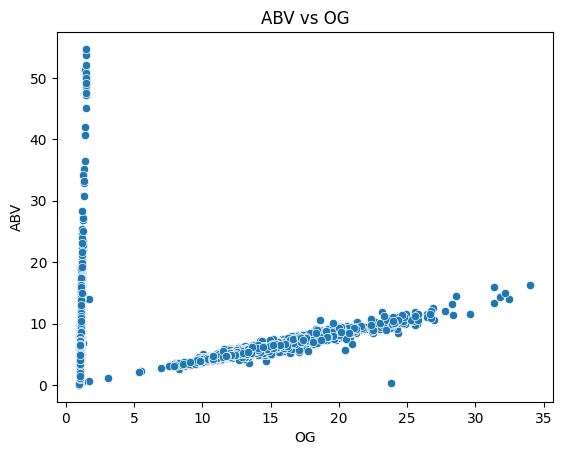

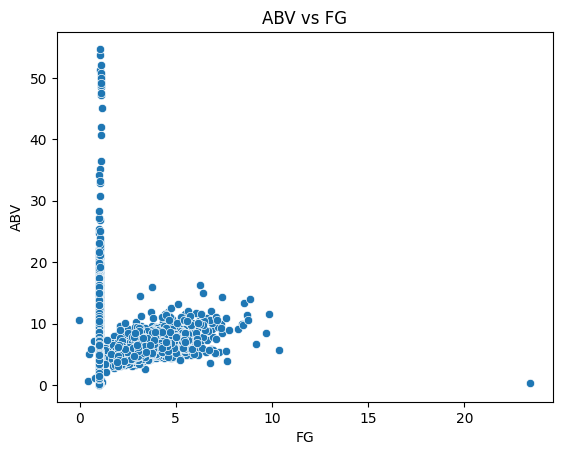

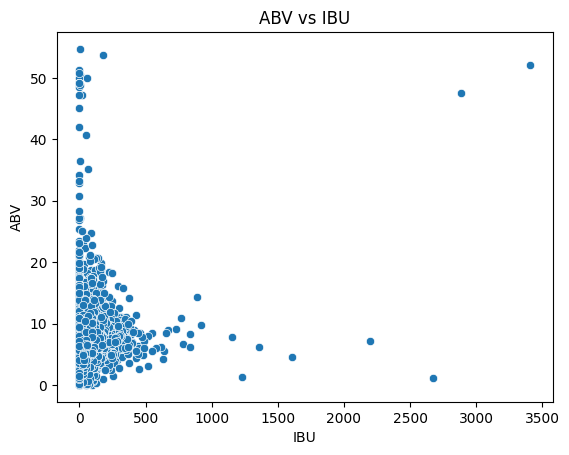

In [ ]:
#Section 3: Variable handling

# 3.1 Correlation Matrix (Pearson, numeric only)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Full Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

# 3.1.1 Top Correlated Pairs (absolute Pearson > 0.7)
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack().dropna()
top_corr = corr_pairs.abs().sort_values(ascending=False)
top_corr = top_corr[top_corr > 0.7]

print("\nTop variable correlations (|r| > 0.7):")
print(top_corr)

# 3.1.2 Correlation with ABV
correlation_with_abv = df.corr(numeric_only=True)['ABV'].sort_values(ascending=False)
print("\nCorrelation of features with ABV:")
print(correlation_with_abv)

# 3.2 Chi-Square Test (association between categorical features)
cat_cols = [col for col in df.select_dtypes(include='object').columns if df[col].nunique() <= 20]

print("\nChi-Square Test: Categorical vs Categorical (≤ 20 unique values)")
for col1, col2 in combinations(cat_cols, 2):
    try:
        table = pd.crosstab(df[col1], df[col2])
        if table.shape[0] > 1 and table.shape[1] > 1:
            chi2, p, _, _ = stats.chi2_contingency(table)
            if p < 0.05:
                print(f"- {col1} vs {col2}: p = {p:.4f} (dependent)")
    except:
        continue

# 3.3 ANOVA (numeric vs categorical with ≤ 5 levels)
print("\nANOVA Test (F-test): Numeric vs Categorical")
for cat in cat_cols:
    if df[cat].nunique() <= 5:
        for num in numeric_cols:
            try:
                groups = [group[num].dropna() for _, group in df.groupby(cat)]
                if len(groups) > 1:
                    f_stat, p_val = stats.f_oneway(*groups)
                    if p_val < 0.05:
                        print(f"- {num} ~ {cat}: p = {p_val:.4f} (significant)")
            except:
                continue

# 3.4 Interaction Effects (1st order: Numeric × Numeric)
print("\nCreated simple first-order interaction terms (e.g., OG × FG):")

interaction_terms = []
interaction_series = []

for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i+1:]:
        new_col = f"{col1}_x_{col2}"
        new_series = df[col1] * df[col2]
        interaction_series.append(new_series.rename(new_col))
        interaction_terms.append(new_col)

df = pd.concat([df] + interaction_series, axis=1)
print(f"Generated {len(interaction_terms)} interaction features.")


# 3.5 Variable Removal Suggestion: Weak correlation with ABV (< 0.05)
weak_corr_vars = correlation_with_abv[correlation_with_abv.abs() < 0.05].index.tolist()
print("\nVariables weakly correlated with ABV (|r| < 0.05):")
print(weak_corr_vars)

## 3.6 Visual inspection – Scatterplots with ABV
key_features = ['OG', 'FG', 'IBU']

for col in key_features:
    if col in df.columns:
        sns.scatterplot(data=df, x=col, y='ABV')
        plt.title(f'ABV vs {col}')
        plt.show()

In [ ]:
#Section 4: Other potential actions

# Check if SRM or Color exists
color_column = 'SRM' if 'SRM' in df.columns else ('Color' if 'Color' in df.columns else None)
if color_column is None:
    print("No column found for color (SRM or Color). Skipping color binning.")
else:
    print(f"Using '{color_column}' as color column.")

#New Features
features = {}

# Ingredient count
ingredient_cols = [col for col in ['SugarScale', 'PrimingMethod', 'PrimingAmount'] if col in df.columns]
features['ingredient_count'] = df[ingredient_cols].notnull().sum(axis=1)

# Top/Bottom fermentation
if 'Style' in df.columns:
    features['uses_top_fermentation'] = df['Style'].str.contains('Ale', case=False, na=False).astype(int)
    features['uses_bottom_fermentation'] = df['Style'].str.contains('Lager', case=False, na=False).astype(int)

# Color binning
if color_column:
    features['ColorCategory'] = pd.cut(df[color_column], bins=[0, 5, 15, 30, 50],
                                       labels=['Pale', 'Amber', 'Dark', 'Very Dark'])

# OG - FG
if 'OG' in df.columns and 'FG' in df.columns:
    features['OG_minus_FG'] = df['OG'] - df['FG']

# Concatenate all new features at once
df = pd.concat([df, pd.DataFrame(features)], axis=1)

# Recalculate correlations with ABV
abv_corr = df.corr(numeric_only=True)['ABV'].sort_values(ascending=False)
print("\n✅ Correlation of numerical variables with ABV:")
print(abv_corr)

Using 'Color' as color column.

✅ Correlation of numerical variables with ABV:
ABV                         1.000000
ABV_x_UserId_log            0.976270
ABV_x_PrimaryTemp           0.867717
ABV_x_Efficiency            0.804134
ABV_x_BoilSize_log          0.793102
                              ...   
BeerID_x_Size(L)_log       -0.058020
BeerID_x_MashThickness     -0.059757
uses_bottom_fermentation   -0.085941
uses_top_fermentation      -0.120876
ingredient_count                 NaN
Name: ABV, Length: 235, dtype: float64
